In [1]:
#Import the needed dependincies
import os
from PIL import Image

import matplotlib.pyplot as plt
import shutil
import numpy as np
import cv2
from skimage import io, exposure
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dropout, Dense
import tensorflow as tf
from keras.models import save_model
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory  
from tensorflow.keras.preprocessing import image
import keras
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
import pandas as pd
import seaborn
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow.keras.applications  import DenseNet121
from tensorflow.keras import layers
np.random.seed(1)
tf.random.set_seed(1)

In [4]:
#rename the files to be filename_subdir
import os

# set the path of the main folder
folder_path = "Downloads/Dataset"

# iterate through all subdirectories
for subdir_name in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subdir_name)
    if os.path.isdir(subfolder_path):
        
        # iterate through all image files in the subdirectory
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                
                # construct the new filename with the subdirectory name
                new_filename = f"{os.path.splitext(filename)[0]}_{subdir_name}{os.path.splitext(filename)[1]}"
                
                # rename the file
                old_file_path = os.path.join(subfolder_path, filename)
                new_file_path = os.path.join(subfolder_path, new_filename)
                os.rename(old_file_path, new_file_path)
                

In [5]:
#create new dir to have all the data
path='Downloads/Dataset2'
# Create the directory
os.makedirs(path, exist_ok=True)


In [6]:

import os

# set the path of the folder
folder_path = "Downloads/Dataset"

# get a list of all the files and directories in the folder
contents = os.listdir(folder_path)

# iterate through the contents and find all the subdirectories
subdirectories = []
for item in contents:
    item_path = os.path.join(folder_path, item)
    if os.path.isdir(item_path):
        subdirectories.append(item_path)


In [8]:
#move all images from folder_path to path
for current_dir in subdirectories:
    for filename in os.listdir(current_dir):
      if filename.endswith('.png'):
          old_path = os.path.join(current_dir, filename)
          new_path = os.path.join(path, filename)
          shutil.move(old_path, new_path)

In [9]:
#Labeling our images
dir_path = path
file_names = os.listdir(dir_path)
label_dict = {}
for file_name in file_names:
    if file_name.endswith('.png'):
        s=file_name.split('.')[0]
        label=s.split('_')[1]
        label_dict[file_name] = label

In [10]:
img_size = (28, 28)
images = []
labels = []

for file_name in file_names:
    if file_name.endswith('.png'):
        file_path = os.path.join(dir_path, file_name)
        image = Image.open(file_path)
        image = image.resize(img_size)
        image = np.array(image)
        images.append(image)
        #listing our labels
        labels.append(label_dict[file_name])

In [11]:
#convert images and labels lists to np.array
images = np.array(images)
labels = np.array(labels)
     

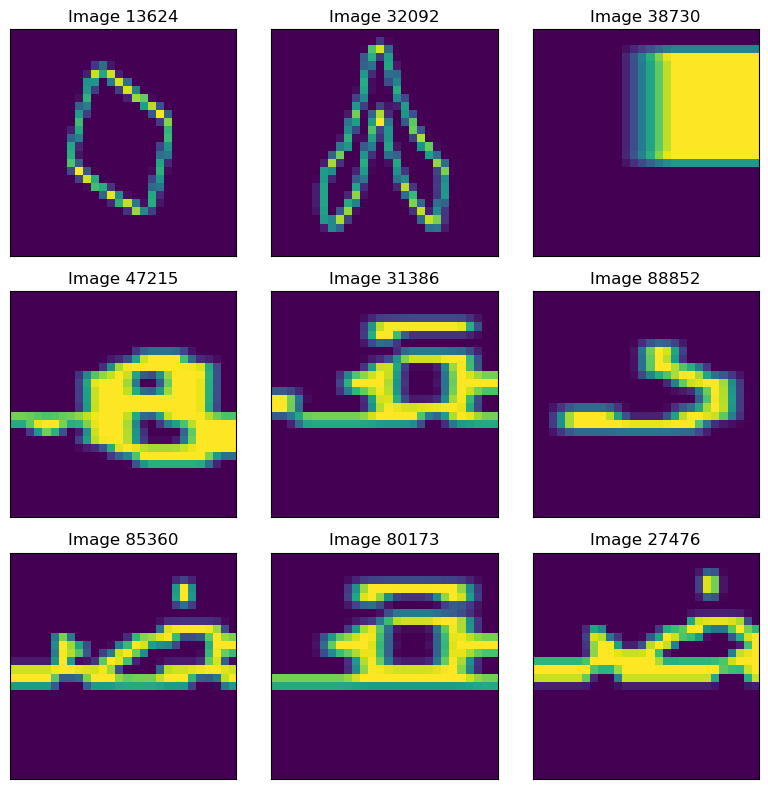

Image 13624 Label ٠
Image 32092 Label ٨
Image 38730 Label ا
Image 47215 Label ه
Image 31386 Label ق
Image 88852 Label د
Image 85360 Label ض
Image 80173 Label ق
Image 27476 Label ض


In [12]:

#take random 9 images indices from our dataset
indices = np.random.choice(range(len(images)), replace=False, size=9)
selected_images = images[indices]
#plot the 9 images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images[i])
    ax.set_title(f"Image {indices[i]}")

plt.tight_layout()
plt.show()
#Print the labels of the images sample
for i in indices:
  print('Image',i ,'Label',labels[i])

In [13]:

#Image Normalization
Normalized_Images=[]
for img in images :
# Normalize the pixel valuesfrom the range[0,255] to the range [0, 1] using min-max scaling
  normalized_img = exposure.rescale_intensity(img, in_range=(0, 255), out_range=(0, 1))
  Normalized_Images.append(normalized_img)

In [14]:

#Contrast Enhancement
Enhanced_Images=[]
# Load the image as a NumPy array
for img in Normalized_Images:
  # Apply contrast stretching to enhance the contrast of the image between percentiles (10,90)
  p10, p90 = np.percentile(img, (10, 90))
  enhanced_img = exposure.rescale_intensity(img, in_range=(p10, p90))
  Enhanced_Images.append(enhanced_img)

In [15]:
# Image Binarization 
Binarized_Images=[]
for img in Enhanced_Images:
  # Binarize the image using a threshold value of 100
  threshold_value = 0.45
  max_value = 1
  binarized_img = np.where(img < threshold_value, 0, max_value)
  Binarized_Images.append(binarized_img)
#Convert to np.array
Binarized_Images=np.array(Binarized_Images)

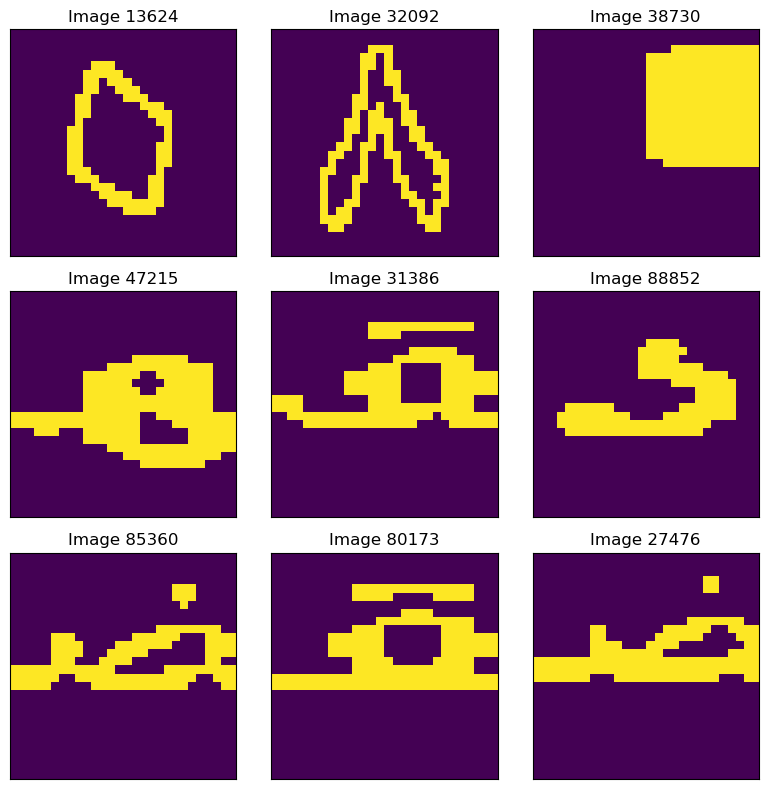

Image 13624 Label ٠
Image 32092 Label ٨
Image 38730 Label ا
Image 47215 Label ه
Image 31386 Label ق
Image 88852 Label د
Image 85360 Label ض
Image 80173 Label ق
Image 27476 Label ض


In [16]:
#View Random sample of our dataset after preprocessing 
selected_imgs=Binarized_Images[indices]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(selected_imgs[i])
    ax.set_title(f"Image {indices[i]}")

plt.tight_layout()
plt.show()
#Print the correct labels for the images of the sample
for i in indices:
  print('Image',i ,'Label',labels[i])

In [17]:
chars=list(set(labels))

# Create a dictionary with characters as keys and their corresponding enumerations as values
char_dict = {char: i for i, char in enumerate(chars)}

# Example list of characters

# Replace characters with their corresponding values in char_dict
char_labels = [char_dict[char] for char in labels]
char_labels=np.array(char_labels)


In [18]:
#inverse of char_dict
val_to_char={i: char for i, char in enumerate(chars)}


In [19]:
train_images, test_images, train_labels, test_labels = train_test_split(Binarized_Images, char_labels, test_size=0.2, random_state=42)


In [20]:

#reshape train and test sets 
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1) /1.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1) /1.0

In [21]:
#Create the CNN Model

model = Sequential()
model.add(Conv2D(32, (3, 3),strides=(1, 1), padding='same',activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(39, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()                                                                 # Then we display our model's summary.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [23]:
#convert labels to categorical to fit to train the model
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, 39)
test_labels = to_categorical(test_labels, 39)

In [24]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [25]:

# Train the model
model.fit(train_images, train_labels, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
2419/2419 [==============================] - 57s 24ms/step - loss: 0.4466 - accuracy: 0.8655
Epoch 2/5
2419/2419 [==============================] - 56s 23ms/step - loss: 0.0890 - accuracy: 0.9720
Epoch 3/5
2419/2419 [==============================] - 57s 24ms/step - loss: 0.0618 - accuracy: 0.9807
Epoch 4/5
2419/2419 [==============================] - 56s 23ms/step - loss: 0.0513 - accuracy: 0.9843
Epoch 5/5
605/605 [==============================] - 5s 7ms/step - loss: 0.0122 - accuracy: 0.9974
Test accuracy: 0.997364342212677


In [576]:
save_model(model,'arabic.h5')


In [26]:
y_pred = model.predict(test_images)
print(classification_report(np.argmax(test_labels,axis=1),np.argmax(y_pred,axis=1)))

605/605 [==============================] - 3s 5ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00       490
           2       1.00      1.00      1.00       479
           3       1.00      1.00      1.00       496
           4       1.00      1.00      1.00       523
           5       1.00      1.00      1.00       491
           6       1.00      1.00      1.00       500
           7       1.00      1.00      1.00       503
           8       1.00      1.00      1.00       506
           9       0.99      1.00      0.99       473
          10       1.00      1.00      1.00       502
          11       1.00      1.00      1.00       517
          12       1.00      1.00      1.00       528
          13       0.99      0.98      0.99       488
          14       1.00      1.00      1.00       486
          15       1.00      1.00      1.00       497
          16       1.00   

In [27]:
import numpy as np

# Convert multiple one-hot encoded labels to integers
train_integer_labels = np.argmax(train_labels, axis=1)
test_integer_labels = np.argmax(test_labels, axis=1)

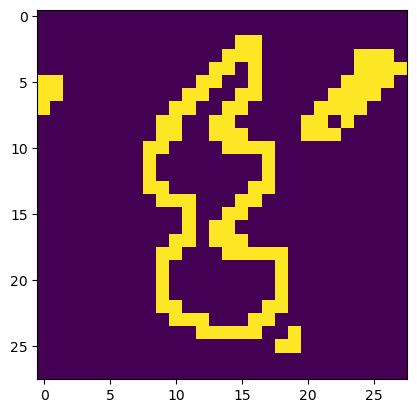

In [28]:
plt.imshow(test_images[777])

In [29]:
img=test_images[777]
pred=model.predict(np.expand_dims(img, axis=0),verbose=0)
val=val_to_char[(np.argmax(pred,axis=1)[0])]

In [37]:
print('الحرف المتوقع :', val)

الحرف المتوقع : ٤


In [31]:
import random
def display_images_result(train_images,row,col):
    fig = plt.figure(figsize=(12,12))
    ax = fig.subplots(row,col)
    for j in range(row):
        for i in range(col):
            fig.suptitle('Images')
            idx=random.randint(0,len(train_images))
            ax[j,i].imshow(train_images[idx])
            pred=model.predict(np.expand_dims(test_images[idx], axis=0))
            ax[j,i].set_title(val_to_char[(np.argmax(pred,axis=1)[0])],fontdict={'fontsize':20,})

    plt.plot()

1/1 [==============================] - 0s 9ms/step


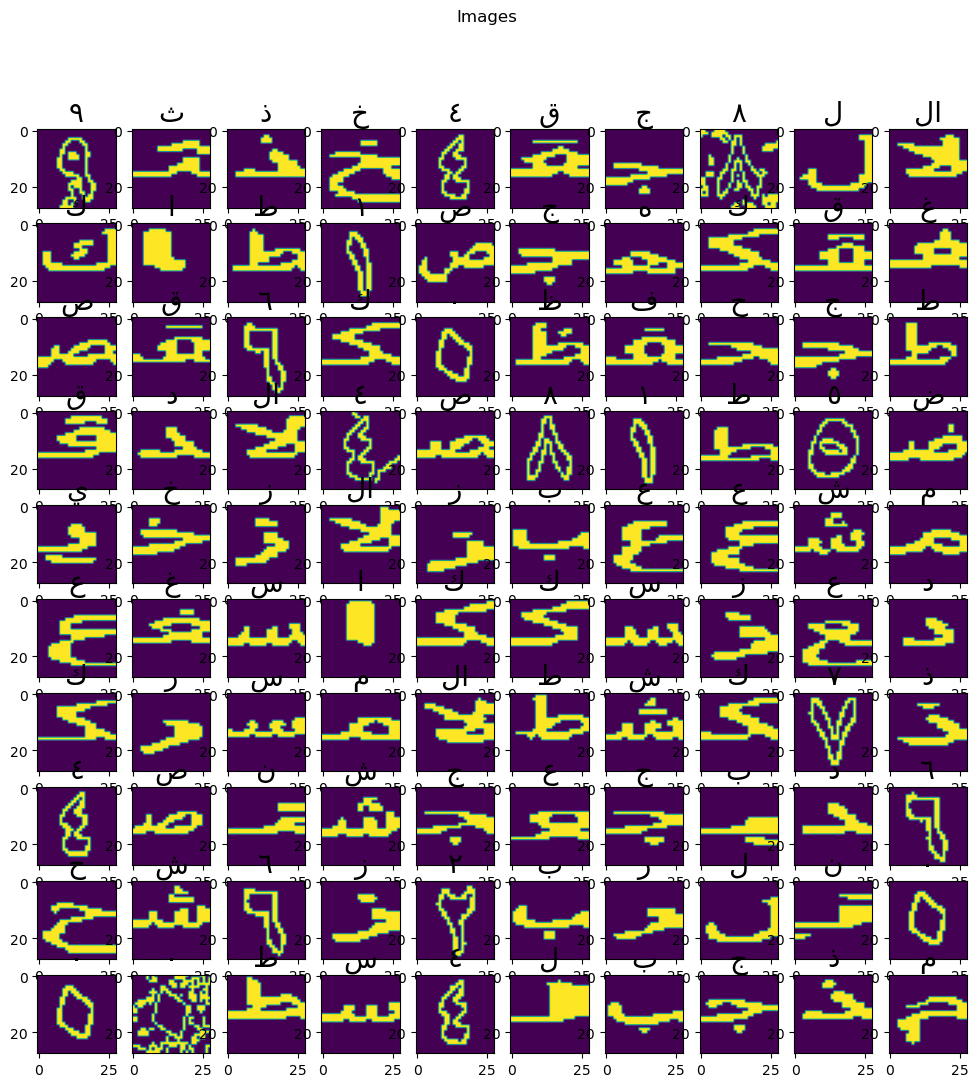

In [32]:
from matplotlib import rcParams
display_images_result(test_images,10,10)